

## Como funciona o Random Forest

No algoritmo Random Forest serão criadas várias árvores de decisão, sendo este conhecimento fundamental para o entendimento do algoritmo.
A seguir iremos construir um algoritmo baseado em modelagem de dados através de florestas aleatórias(Random Florest).

O RandomFlorest é um metodo composto por uma floresta aleatória, ou seja é construido varias árvores aleatórias em cima de um amostral tambem totalmente aleátorio e em cima dele o melhor recurso de divisão de subconjunto é usado, tendo em vista que a medida que passa e que as árvores sejam criadas cada vez mais vai se chegando em um modelo mais preciso e que acrescente melhor no resultado. Neste método as medias obtidas são tidas como resultados.


## Árvores de Decisão(Decision Trees)

As Árvores de Decisão ou Decision Trees,estabelecem regras para a tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma com "nós" onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, ate a finalização da árvore.


## Seleção de amostras

Diferentemente do que acontece na criação de uma árvore de decisão simples, ao utilizar o RandomForest, o primeiro passo executado pelo algoritmo será selecionar aleatoriamente algumas amostras dos dados de treino, e não sua totalidade.

Nesta etapa é utilizado o bootstrap, que é um metodo de reamostragem onde as amostras selecionadas podem ser repetidas na seleção. Com esta primeira seleção de amostras será construida a primeira árvore de decisão.
 
## Seleção das variaveis para cada nó

Conforme vimos nos detalhes sobre a construção de uma árvore de decisão, para começar é preciso definir o primeiro nó da árvore(nó raiz), que será a primeira condição verificada, dando origem aos dois primeiros ramos.
Utilizando o algoritmo de entropia ou índice Gini, será escolhida a melhor várivel para compor o nó raiz, variando de acordo com o método utilizado.
No RandomForest a definição desta variável não acontece com base em todas as váriaveis disponiveis. O algoritmo irá escolher de maneira aleátoria(random) duas ou mais variáveis, e então realizar os cálculos com base nas amostras selecionadas, para definir qual dessas variáveis será utilizada no primeiro nó.

Para escolher a variável do próximo nó, novamente serão escolhidas duas (ou mais) variáveis, excluindo as já selecionadas anteriormente, e o processo de escolha se repetirá. Desta forma a árvore será contruida até o último nó. A quantidade de variáveis a serem escolhidas pode ser definida na criação do modelo.

É evidente que este não é o melhor método para a construção de úm árvore de decisão. O algoritmo pode, sem querer, selecionar as duas piores variáveis na primeira seleção, escolhendo uma váriavel péssima para o primeiro nó. Mas como serão construídas muitas árvores, essa estratégia se torna poderosa, e costuma evitar o overffiting.

## Construção das próximas árvores

Na construção da próxima árvore, os dois processos anteriores se repetirão, levando a criação de uma nova árvore. Provavelmente essa árvore sera diferente da primeira, pois tanto na seleção das amostras, quanto na seleção das variáveis, o processo acontece de maneira aleatória.

Podemos construir quantas árvores quiseremos, sendo que quanto mais árvores criadas, melhor serão os resultados do modelo, até que em determinado ponto, onde uma nova árvore não conseguirá levar a uma melhora significativa no desempenho do modelo.

É importante lembrarmos que quanto mais árvores forem criadas, maior será o tempo de criação de modelo.

## Prevendo novos valores

Com o modelo de machine learning devidamente criado, podemos apresentar novos dados e obter resultado da previsão. Cada árvore criada irá apresentar o seu resultado, sendo que em problemas de regressão será utilizada a média dos valores previstos, e está média informada como resultado final, e em problemas de classificação o resultado que mais vezes foi apresentado será o escolhido. 



## Diferença entre Bagging e Random Florest

Ambas as florestas de ensacamento(bagging) e aleatórias(Random) são algoritmos baseados em conjuntos os quais tem como objetivo reduzir a complexidade dos modelos que superajustam os dados de treinamento. 
A agregação Bootstrap, também chamada de bagging, é um dos métodos de ensemble mais antigos e eficiente para evitar o overfitting.
É uma metatécnica que usa vários classificadores para melhorar a precisão preditiva. Ensacamento significa simplesmente extrair amostras aleatórias da amostra de treinamento para substituição, a fim de obter um conjunto de modelos diferentes. A floresta aleatória é um algoritmo de aprendizado de máquina supervisionado baseado no aprendizado conjunto e uma evolução do algoritmo de ensacamento original de Breiman.



Leia mais em: [Difference Between Bagging and Random Forest | Difference Between](http://www.differencebetween.net/technology/difference-between-bagging-and-random-forest/#ixzz7wd5Oelgl)

# Desenvolvendo modelagem em Random Forest

## Introdução do problema

O problema que abordaremos é prever a temperatura máxima para amanhã na cidade de Seattle WA.
Vamos agir como se não tivessemos acesso a nenhuma previsão do tempo. O que temos acesso é um ano de temperaturas máximas históricas, as temperaturas dos dois dias anteriores e uma estimativa de um amigo que sempre afirma saber tudo sobre clima. Este é um problema de aprendizado de máquina de regressão supervisionado. É supervisionado porque temos as características  e os alvos de temperatura que queremos prever. Durante o treinamento, damos a Random Florest os recursos e os destinos e ela deve aprender como mapear os dados para uma previsão. Além disso, esta é uma tarefa de regressão porque o valor do destino é continuo ( ao contrário de classes discretas na classificação). Isso é praticamente todo o histórico que precisamos. Vamos ao inicio.

## Roteiro

Antes de irmos direto para a programação, devemos apresentar um breve guia para nos mantermos no caminho certo As etapas a seguir formam a base para qualquer fluxo de trabalho de Machining Learn, uma vez que tenhamos um problema e um modelo em mente:

- 1. Declare a pergunta e determine os dados necessários.
- 2. Adquira os dados em um formato acessível.
- 3. Identifique e corrija pontos/anomalias de dados ausentes, conforme necessário.
- 4. Prepare os dados para o modelo de aprendizado de máquina.
- 5. Estabeleça um modelo de linha de base que você pretende realizar.
- 6. Treine o modelo nos dados de treinamento.
- 7. Faça previsões sobre os dados de teste
- 8. Compare as previsões com os alvos conhecidos do conjunto de testes e calcule as métricas de desempenho.
- 9. Se o desempenho não for satisfatório, ajuste o modelo, adquira mais dados ou tente uma técnica de modelagem diferente
- 10. Interprete o modelo e relate os resultados visual e numericamente.

O primeiro passo já estra traçado! Temos o questionamento central: "É possivel prevermos a temperatura máxima amanhã para Seattle?" e sabemos que temos acesso às temperaturas máximas históricas do ano passado em Seattle, WA.

## Aquisição de dados

Primeiramente precisamos de alguns dados. Para usar um exemplo realista, obtemos alguns dados meteorológico para Seattle WA de 2016 usando a ferramenta NOAA Climate Data Online. Normalmente, cerca de 80% do tempo gasto na analíse de dados é limpeza e tratamento de dados, mas essa demanda de trabalho pode ser reduzida ao localizar fontes de dados de alta qualidade. A ferramenta NOAA é surpreendentemente fácil de usar e os dados podem ser baixados como arquivos csv limpos que podem ser analisados em linguagens como Python ou R. O arquivo de dados completo está disponivel para download em : [CSV](https://drive.google.com/file/d/1pko9oRmCllAxipZoa3aoztGZfPAD2iwj/view)

O código Python a seguir carrega os dados csv e exibe a estrutura de dados:

In [1]:
# Pandas é usado para manipulação de dados 
import pandas as pd
# Lê os dados e exibe as 5 primeiras linhas 
features = pd.read_csv('temps.csv') 
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


As informações estão tidy data com cada linha formando um dado, com valores das variáveis nas colunas.

A seguir serão explicadas as colunas:

- **year:** 2016.
- **month:** número para o mês do ano.
- **day:** número para o dia do ano.
- **week:** dia da semana com uma string de caracteres.
- **temp_2:** temperatura máxima 2 dias antes.
- **temp_1:** temperatura máxima 1 dia antes.
- **average:** temperatura máxima média histórica.
- **actual:** medição de temperatura máxima
- **friend:** a previsão do seu amigo, um número aleatório entre 20 abaixo da média e 20 acima da média.

## Identificar anomalias/ dados ausentes

Se observarmos para as dimensões do banco de dados, notamos que existem apenas 348 linhas frente a 366 dias do ano de 2016. Percebe-se olhando o NOAA, vários dados ausentes, o que é um bom lembrete de que dados coletados no mundo real nunca serão perfeitos. Dados ausentes podem afetar uma análise, assim como dados incorretos ou discrepantes. Nesse caso, os dados ausentes não terão grande efeito e a qualidade dos dados é boa devido à fonte. Também podemos ver que há nove colunas que representam oito recursos e um alvo('real').

In [2]:
print('A forma de nossas feições é:', features.shape) 


A forma de nossas feições é: (348, 12)


Para identificar anomalias, podemos calcular estatísticas resumidas rapidamente.

In [3]:
# Estatísticas descritivas para cada coluna 
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Não há nenhum dado em especifico que apareça imediantamente como anômalo e nenhum zero em nenhuma das colunas de medição. Outro método para verificar a qualidade dos dados é fazer gráficos básico.
Muitas vezes é mais fácil detectar anomalias em um gráfico do que em números. Deixei de fora o código real aqui, porque a plotagem em Python não é intuitiva, mas sinta-se à vontade para consultar o notebookpara uma implementação completa (como qualquer bom cientista de dados, praticamente copiei e colei o código de plotagem do (Stack Overflow).


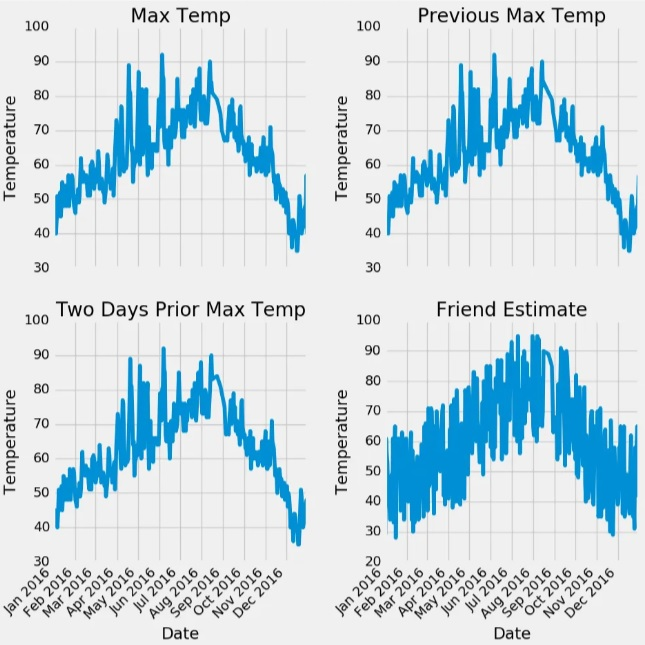

Examinando as estatística quantitativas e os gráficos, podemos ter confiança na alta qualidade de nossos dados. Não há outliers claros e, embora haja alguns pontos ausentes, eles não prejudicam a análise.

## Preparação de dados

Infelizmente, ainda não chegamos ao ponto em que você pode simplesmente inserir dados brutos em um modelo e fazer com que ele retorne uma resposta (embora haja pessoas trabalhando nisso)!
Precisaremos fazer algumas pequenas modificações para colocar nossos dados em termos compreensiveis por máquina. Usaremos a biblioteca Python [PANDAS](https://pandas.pydata.org/) Para nossa manipulação de dados contando, na estrutura conhecida como dataframe, que é basicamente uma planilha em Excel com linhas e colunas.

As etapas exatas para a preparação dos dados dependerão do modelo usado e dos dados coletados, mas alguma quantidade de manipulação de dados será necessária para qualquer aplicativo de aprendizado máquina.

## Codificação One-Hot

O primeiro passo para nós é conhecido como codificação one-hot dos dados. Esse processo pega variáveis categóricas, como dias da semana, e as converte em uma representação númerica sem uma ordenação arbitrária. Os dias da semaan são intuitivos para nós porque os usamos o tempo todo. Você (espero) nunca encontrará alguém que não saiba que 'Seg' se refere ao primeiro dia da semana de trabalho, mas as máquinas não tem nenhum conhecimento intuitivo. O que os computadores sabem são números e, para o aprendizado de máquina, devemos acomodá-los. Poderiamos simplesmente mapear os dias da semana para os números de 1 a 7, mas isso pode levar o algoritmo a atribuir mais importância ao domingo porque ele tem um valor númerico mais alto. Em vez disso, alteramos a coluna de dias da semana em sete colunas de dados. Isso é melhor ilustrado pictoricamente. Uma codificação quente leva a isso:

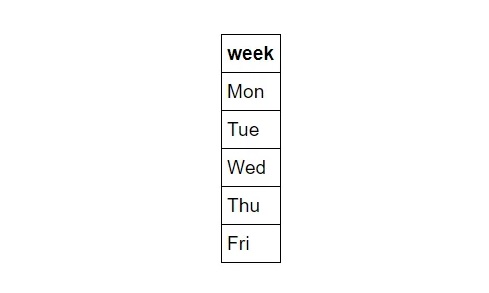


e o tranforma em:



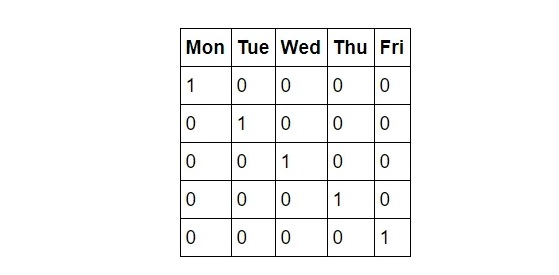

Portanto, se um ponto de dados for uma quarta-feira, ele tera 1 na coluna de quarta e 0 em todas as outras colunas. Este processo pode ser feito em pandas em uma única linha!

In [4]:
# One-hot codifica os dados usando pandas get_dummies 
features = pd.get_dummies(features)
# Exibe as primeiras 5 linhas das últimas 12 colunas 
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


A forma de dados agora é 349 x 15 e todas as colunas são números, exatamente como algoritmo gosta.

## Recursos e destinos e converter dados em matrizes

Agora, precisamos separar os dados em recursos e alvos. O alvo, também conhecido como rótulo, é o valor que queremos prever, neste caso a temperatura máxima real e as caracteristicas são todas as colunas que o modelo usa para fazer uma previsão. Também converteremos os dataframes do Pandas em arrays [Numpy](https://numpy.org/) porque é assim que o algoritmo funciona.(Salvo os cabeçalhos das colunas, que são os nomes das feições, em uma lista para visualização posterior).

In [5]:
# Use numpy para converter em arrays 
import numpy as np
# Labels são os valores que queremos prever 
labels = np.array(features['actual'])
# Remova os rótulos dos recursos 
# o eixo 1 refere-se às colunas 
features= features.drop('actual', axis = 1)
# Salvando nomes de recursos para uso posterior 
feature_list = list(features.columns)
# Converter para numpy array 
features = np.array(features)

## Conjunto de treinamento e teste

Há uma etapa final de preparação de dados: dividir os dados em conjuntos de treinamento(train) e teste(test). Durante o treinamento, deixamos o modelo 'ver' as respostas, neste caso a temperatura real, para que ele aprenda a prever a temperatura a partir dos recursos. Esperamos que haja alguma relação entre todos os recursos e o valor de destino, e o trabalho do modelo é aprender essa relação durante o treinamento. Então, quando chega a hora de avaliar o modelo, pedimos que ele faça previsões em um conjunto de testes onde ele só tem acesso aos recursos(não às respostas)! Como temos previsões com o valor verdadeiro para avaliar a precisão do modelo. Geralmente, ao treinar um modelo, dividimos aleatoriamente os dados em conjuntos de treinamento e teste para obter uma representação de todos os pontos de dados (se treinarmos nos primeiros nove meses do ano e depois usarmos os três meses finais para a previsão, nosso algoritmo não terá um bom desempenho porque não viu nenhum dado desses ultimos três meses). Estou definindo o estado aleatório como 42, o que significa que os resultados serão os mesmos sempre que executar a divisão para obter resultados reproduziveis.
O código a seguir divide os conjuntos de dados com outra única linha:

In [6]:
# Usando Skicit-learn para dividir dados em conjuntos de treinamento e teste 
from sklearn.model_selection import train_test_split
# Divida os dados em conjuntos de treinamento e teste 
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

Podemos observar a forma de todos dados para garantir que fizemos tudo de forma correta. Esperamos que o número de colunas dos recursos de treinamento corresponda ao número de colunas e o número de linhas do recurso de teste para corresponder aos respectivos recursos de treinamento e teste e os rótulos:

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


Parece que está tudo em ordem! Apenas para recapitular, para colocar os dados em um formato aceitável para aprendizado de máquina, nós:

- 1. Váriaveis categóricas codificadas one-hot
- 2. Dividir dados em recursos e rótulos
- 3. Convertido em matrizes
- 4. Divida os dados em conjuntos de treinamento e teste

Dependendo do conjunto de dados inicial, pode haver trabalho extra envolvido, como remover outliers, imputar valores ausentes ou converter variáveis temporais em representação cíclicas. Essas etapas podem parecer arbitrárias no início, mas depois de obter o fluxo de trabalho básico, geralmente será o mesmo para qualquer problema de aprendizado de máquina.  Trata-se de pegar dados legíveis por humanos e colocá-los em um formato que possa ser entendido por um modelo de aprendizado de máquina.

## Estabelecer linha de base

Antes de podermos fazer e avaliar previsões, precisamos pré-estabelecer uma linha de base, uma medida sensata que esperamos atingir e/ou superar com nosso modelo. Se nosso modelo não puder melhorar a linha de base, não será bem-sucedido e devemos tentar um modelo diferente ou admitir que o aprendizado de máquina não é adequado para o nosso problema. A previsão de linha de base para o nosso caso pode ser as medidas históricas de temperatura máxima. Em outras palavras, nossa linha de base é o erro que obteriamos se simplesmente previssemos a temperatura máxima média para todos os dias.

In [8]:
# As previsões de linha de base são as médias históricas 
baseline_preds = test_features[:, feature_list.index('average')]
# Erros de linha de base e erro de linha de base médio de exibição 
baseline_errors = abs(baseline_preds - test_labels)
print('Erro de linha de base médio: ', round(np.mean(baseline_errors), 2))

Erro de linha de base médio:  5.06


Agora temos nosso objetivo. Se não podermos transpor o erro médio de 5 graus, precisamos repensar nossa abordagem nesta modelagem.

## Modelo de trem ou Train model

Depois de todo trabalho de preparação de dados, criar e treinar o modelo é bem simples usando o [Scikt-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). Importamos o modelo e ajustamos nos dados de treinamento. (Novamente definindo o estado aleatório para resultados reprodutiveis). Todo esse processo tem apenas 3 linhas no scikit-learn!

In [9]:
# Importe o modelo que estamos usando 
from sklearn.ensemble import RandomForestRegressor
# Modelo instanciado com 1000 árvores de decisão 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Treine o modelo nos dados de treinamento 
rf.fit(train_features, train_labels);

## Faça previsões no conjunto de teste

Nosso modelo agora foi treinado para aprender as relações entre os recursos e os alvos. O próximo passo é descobrir o quão bom é o modelo! Para fazer isso, fazemos previsões sobre os recursos do teste (o modelo nunca pode ver as respostas do teste). Em seguida, comparamos as previsões com as respostas conhecidas. Ao realizar a regressão, precisamos ter certeza de usar o erro absoluto porque esperamos algumas de nossas respostas sejam baixas e outras altas. Estamos interessados em quão longe nossa previsão média está do valor real, então tomamos o valor absoluto ( como também fizemos ao estabelecer a linda de base).

Fazer previsões sem modelo é outro comando de 1 linha no Scikit-learn

In [10]:
# Use o método de previsão da floresta nas 
predictions = rf.predict(test_features)
# Calculo dos erros absolutos
errors = abs(predictions - test_labels)
# Imprima o erro médio absoluto (mae)
print('Erro Absoluto:', round(np.mean(errors), 2), 'degrees.')

Erro Absoluto: 3.87 degrees.


## Determinar métricas de desempenho

Para colocar nossas previsões em perspectiva, podemos calcular uma precisão usando o erro percentual médio subtráido de 100%

In [11]:
# Calcula erro percentual médio absoluto (MAPE)
mape = 100 * (errors / test_labels)
# Calcule e exiba precisão exatidão
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


Isso parece muito bom! Nosso modelo aprendeu a prever a temperatura máxima para o dia seguinte em Seattle com 94% de precisão.

## Melhore o modelo, se necessário

No fluxo de trabalho de aprendizado de máquina usual, isso seria quando iniciar o ajuste de hiperparâmetro. Esta é uma frase complicada que significa "ajustar as configurações para melhorar o desempenho"(as configurações são conhecidas como [hiperparâmetros](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) para distingui-las dos parâmetros do modelo aprendidos durante o treinamento). A maneira mais comum de fazer isso é simplesmente criar vários modelos com configurações diferentes, avaliá-los todos nos mesmos conjuntos de validação e ver qual desses se sai melhor. Claro, isso seria um processo tedioso para fazer manualmente, e existem [métodos automatizados](https://scikit-learn.org/stable/modules/grid_search.html) para fazer esse processo no Scikt-learn. O ajuste de hiperparâmetros geralmente é mais de [engenharia](https://www.oreilly.com/content/big-datas-biggest-secret-hyperparameter-tuning/) do que baseado em teoria, e particularmente encorajaria qualquer pessoa interessada a verificar a [documentação](https://scikit-learn.org/stable/modules/grid_search.html) e começar a se divertir! Uma precisão de 94% é satisfatória para esse problema, mas lembre-se que o primeiro modelo construído quase nunca será o modelo que chegará à produção.

## Interpretar o modelo e relatar os resultados

Neste ponto, sabemos que nosso modelo é bom, mas é praticamente uma [caixa preta](https://www.technologyreview.com/2017/04/11/5113/the-dark-secret-at-the-heart-of-ai/). Alimentamos alguns arrays Numpys para treinamento, pedimos para fazer uma previsão, avaliamos as previsões e verificamos se são razoáveis. A questão é: como esse modelo chega aos valores? Existem duas abordagens para entender a floresta aleatória (Random Florest): primeiro, podemos observar uma única árvore na floresta e, segundo, podemos observar as importâncias dos recursos de nossas variáveis explicativas.

### Visualizando uma única árvore de decisão

Uma das partes mais legais da implementação da Random Forest no Scikt-learn é que podemos realmente examinar qualquer uma das árvores da floresta. Vamos selecionar uma árvore e salvar a árvore inteira como imagem.

O código a seguir pega uma árvore da floresta e a salva como uma imagem.

In [12]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [15]:

# Ferramentas de importação necessárias para visualização
from sklearn.tree import export_graphviz
import pydot
# Retire uma árvore da floresta
tree = rf.estimators_[5]
# Exporte a imagem para um arquivo de ponto
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use o arquivo dot para criar um gráfico
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Escreva o gráfico em um arquivo png
graph.write_png('tree.png')


Vamos dar uma olhada:

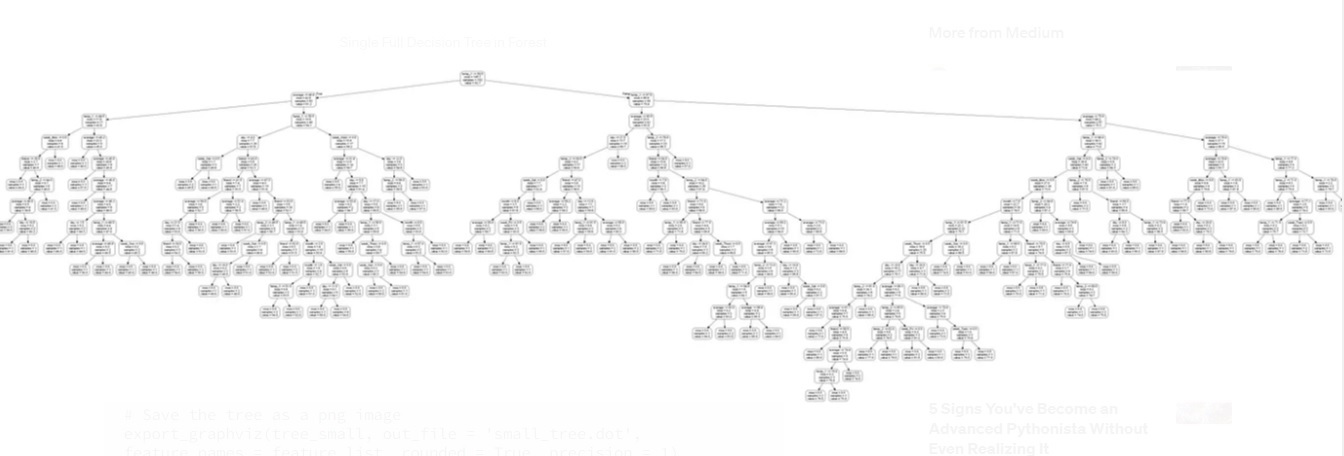

$$
Árvore\, de\, decisão\, completa\, única\, na \,floresta
$$

Wow! Parece uma árvore bastante expansiva com 15 camadas (na verdade, é uma árvore bem pequena em comparação com algumas que já vi). Você pode baixar esta [imagem](https://drive.google.com/file/d/138hewRWvyijnIuFyo21nbff-KbHci_4N/view) e examina-lá com mais detalhes, mas para facilitar as coisas, limitarei a profundidade das árvores na floresta para produzir uma imagem compreensível.

In [16]:
# Limite a profundidade da árvore a 3 níveis
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extraia a pequena árvore 
tree_small = rf_small.estimators_[5]
# Salve a árvore como uma imagem png 
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

Aqui esta a árvore de tamanho reduzido anotada com rótulos

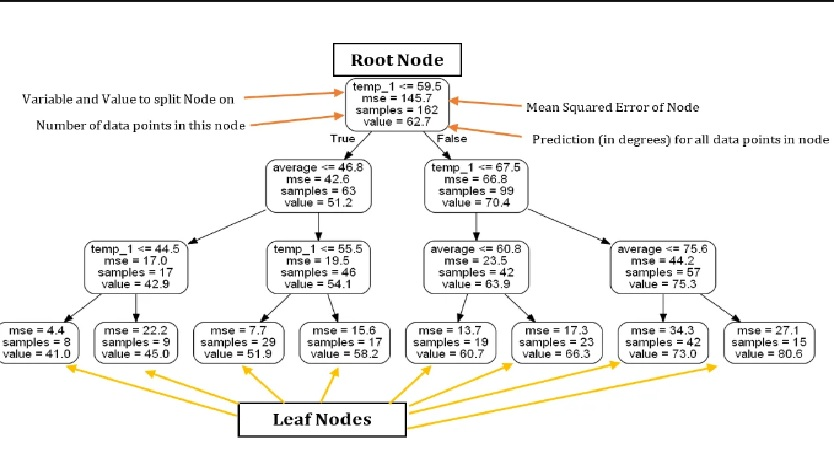

Com base apenas nessa árvore, podemos fazer uma previsão para qualquer novo ponto de dados. Vamos dar um exemplo de previsão para quarta-feira, 27 de dezembro de 2017. As variáveis(reais) são: temp_2 = 39, temp_1 = 3, average = 44 e friend = 30. Começamos no nó raiz e a primeira resposta é verdadeiro porque temp_1=<59,5. Movemo-nos para a esquerda e encontramos a segunda questão, que tambem é verdadeira com média =< 46,8. Desça para a esquerda e vá para a terceira e última questão, que tambem é Verdadeiro porque temp_1 <=44,5. Portanto, concluimos que nossa estimativa para a temperatura máxima é de 41,0 graus, conforme indicado pelo valor no nó da folha. Uma observação interessante é que no nó raiz, existem apenas 162 amostras, apesar de haver 261 pontos de dados de treinamento [bagging, abreviação de bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating). (Podemos desligar a amostragem com substituição e usar todos os pontos de dados definindo bootstrap = False ao fazer a floresta). A amostragem aleatória de pontos de dados, combinada com a amostragem aleatória de um subconjunto dos recursos em cada nó da árvore, é o motivo pelo qual o modelo é chamado de floresta 'aleatória'.

Além disso, observe que em nossa árvore, existem apenas 2 variáveis que realmente usamos para fazer uma previsão! De acordo com essa árvore de decisão especifíca, o restante dos recursos não é relevante para fazer uma previsão. Mês do ano, dia do mês e a previsão do nosso amigo são totalmente inúteis para prever a temperatura máxima amanhã! A única informação importante de acordo com nossa árvore simples é a temperatura 1 dia antes e a média histórica. A visualização da árvore aumentou nosso conhecimento do problema e agora sabemos quais dados procurar se formos solicitados a fazer uma previsão!

### Importâncias Variáveis

Para quantificar a utilidade de todas as variáveis em toda a floresta aleatória, podemos observar as importâncias relativas das variáveis. As 
[importâncias retornadas em Scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) representam o quanto a inclusão de uma variável especifíca melhora a previsão. O cálculo real da importancia está além do escopo desta postagem, mas podemos usar os números para fazer comparações relativas entre as variáveis.

O código aqui tira proveito de vários truques de linguagem Python, como [lista abrangente](https://python-course.eu/advanced-python/list-comprehension.php), [zip](https://bradmontgomery.net/blog/pythons-zip-map-and-lambda/), [classificação](https://docs.python.org/3/howto/sorting.html) e [descompactação de argumentos](https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python/).
Não é tão importante entendê-los no momento, mas se você quiser se tornar habilidoso em Python, essas ferramentas são indispensáveis.

In [19]:
# Obter importâncias de recursos numéricos
importances = list(rf.feature_importances_)
# Lista de tuplas com variável e importância
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Classifique as importâncias dos recursos pela primeira mais importante 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Imprima o recurso e as importâncias
[print('Variável: {:20} Importancia: {}'.format(*pair)) for pair in feature_importances];

Variável: temp_1               Importancia: 0.66
Variável: average              Importancia: 0.15
Variável: forecast_noaa        Importancia: 0.05
Variável: forecast_acc         Importancia: 0.03
Variável: day                  Importancia: 0.02
Variável: temp_2               Importancia: 0.02
Variável: forecast_under       Importancia: 0.02
Variável: friend               Importancia: 0.02
Variável: month                Importancia: 0.01
Variável: year                 Importancia: 0.0
Variável: week_Fri             Importancia: 0.0
Variável: week_Mon             Importancia: 0.0
Variável: week_Sat             Importancia: 0.0
Variável: week_Sun             Importancia: 0.0
Variável: week_Thurs           Importancia: 0.0
Variável: week_Tues            Importancia: 0.0
Variável: week_Wed             Importancia: 0.0


No topo da lista está temp_1, a temperatura máxima do dia anterior. Isso nos diz que o melhor preditor da temperatura máxima de um dia é a temperatura máxima do dia anterior, uma descoberta bastante intuitiva. O segundo fator mais importante é a temperatura máxima médica histórica, tambem não tão surpreendente. Seu amigo acaba não sendo muito útil, junto com o dia da semana, o ano, o mês e a temperatura 2 dias antes. 
Todas essas importâncias fazem sentido, pois não esperariamos que o dia da semana fosse um indicador da temperatura máxima, pois não tem nada a ver com clima. Além disso, o ano é o mesmo para todos os pontos de dados, e portanto, não nos fornece nenhuma informação para prever a temperatura máxima.

Em futuras implementações do modelo, podemos remover aquelas variáveis que não tem importância e o desempenho não será prejudicado.
Além disso, se estivermos usando um modelo diferente, digamos uma máquina de vetores de suporte, poderiamos usar os atributos do recursos da floresta aleatória(Random Florest) como um tipo de método de seleção de recursos. Vamos criar rapidamente uma floresta aleatória com apenas duas variáveis mais importantes, a temperatura máxima 1 dia antes e a média histórica e comparar o desenho.

In [23]:
%time
# Nova floresta aleatória com apenas as duas variáveis ​​mais importantes 
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extraia os dois recursos mais importantes
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Treine a floresta aleatória 
rf_most_important.fit(train_important, train_labels)

# Faça previsões e determine as previsões de erro
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Exiba as métricas de desempenho
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


CPU times: total: 0 ns
Wall time: 0 ns
Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


Isso nos diz que, na verdade, não precisamos de todos os dados que coletamos para fazer previsões precisas! Se continuassemos a usar esse modelo, poderiamos coletar apenas duas variáveis e obter quase o mesmo desempenho. Em um ambiente de produção, precisaríamos pesar a diminuição na previsão versus o tempo extra necessário para obter mais informações. Saber como encontrar o equilibrio certo entre desemepenho e custo é uma habilidade essencial para um engenheiro de aprendizado de máquina (machine learning) e, em última análise, dependerá do problema!

Neste ponto, cobrimos praticamente tudo o que há para saber sobre uma implementaçao básica da floresta aleatória(Random Florest) para um problema de regressão supervisionado. Podemos nos sentir confiantes de que nosso modelo pode prever a temperatura máxima amanhã com 94% de precisão a partir de um ano de dados históricos. A partir daqui, sinta-se à vontade para brincar com este exemplo ou usar o modelo em um conjunto de dados a sua escolha. Encerramos fazendo algumas visualizações de gráficos e modelagens. São muito bons em visualização e nos ajudam a diagnosticar nosso modelo porque e sintetizam muitos números em uma única imagem só que podemos analisar rapidamente.

### Visualizações

O primeiro gráfico que farei é um gráfico de barras simples das importâncias dos recursos para ilustrar as disparidades na significância relativa das variáveis. A plotagem em Python não é intuitiva e acaba-se procurando bastante coisas no [Stack Overflow](https://stackoverflow.com/) quando fala-se em gráficos. Não se preocupe o código aqui não precisa fazer muito sentido, às vezes não é necessario entender totalmente o código para obter o resultado final desejado!

CPU times: total: 0 ns
Wall time: 0 ns


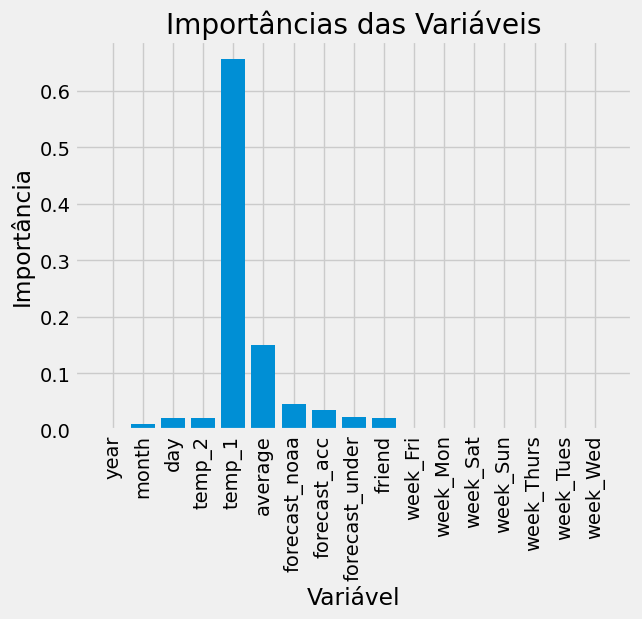

In [27]:
%time

# Import matplotlib para plotagem e use o comando magic para Jupyter Notebooks 
import matplotlib.pyplot as plt
%matplotlib inline

# Defina o estilo
plt.style.use('fivethirtyeight')

# lista de x locais para plotagem 
x_values = list(range(len(importances)))

# Faça um gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# Rótulos de marca para o eixo x 
plt.xticks(x_values, feature_list, rotation='vertical')

# Rótulos e título do eixo 
plt.ylabel('Importância'); plt.xlabel('Variável'); plt.title('Importâncias das Variáveis');



Em seguida, podemos plotar todo o conjunto de dados com as previsões destacadas. Isso requer um pouco de manipulação de dados, mas não é muito dificil. Podemos usar esse gráfico para determinar se há outliers nos dados ou em nossas previsões.

CPU times: total: 0 ns
Wall time: 0 ns


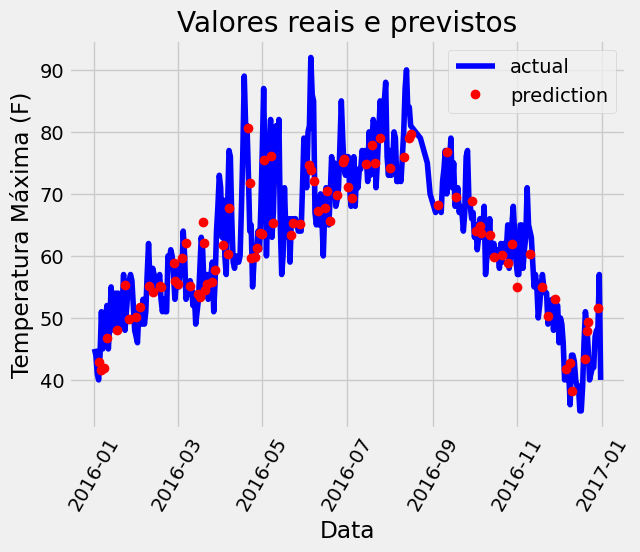

In [34]:
%time
# Use datetime para criar objetos de data para plotar 
import datetime

# Datas dos valores de treinamento
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# Liste e depois converta em datas de objeto
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe com valores verdadeiros e datas
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Datas das previsões
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Coluna de datas
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Converter para objetos datetime 
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe com previsões e datas
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plota os valores reais
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plota os valores previstos
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 60); 
plt.legend()

# Etiquetas do gráfico 
plt.xlabel('Data'); plt.ylabel('Temperatura Máxima (F)'); plt.title('Valores reais e previstos');

Um pouco de trabalho para um gráfico bonito! Não observamos quaisquer outliers perceptíveis que precisem ser corrigidos. Para diagnosticar melhor o modelo, podemos plotar ainda os resíduos(os erros), para ver se nosso modelo tem tendência a superestimar ou subestimar, e também podemos ver se os resíduos são normalmente distribuídos. No entanto, farei apenas um gráfico final mostrando os valores reais, a temperatura do dia anterior, a média histórica e a previsão do nosso amigo. Isso nos permitirá ver a diferença entre variáveis úteis e aquelas que não são tão úteis.

CPU times: total: 0 ns
Wall time: 0 ns


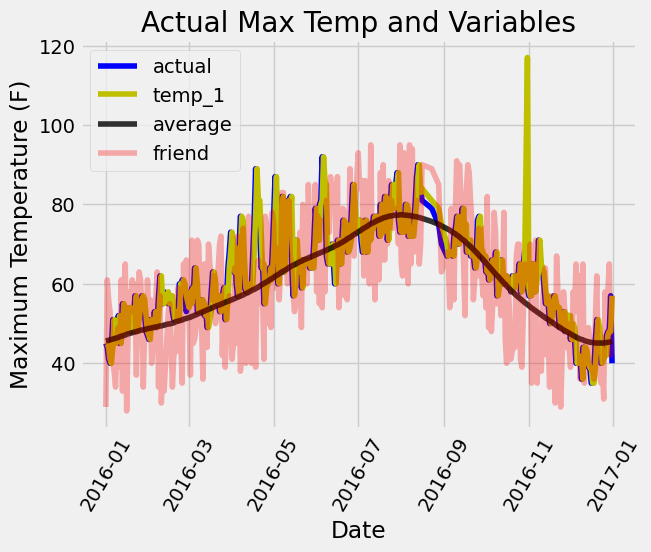

In [40]:
%time
# Torne os dados acessíveis para plotagem
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plote todos os dados como linhas
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatando gráfico 

plt.legend(); plt.xticks(rotation = 60);

# Etiquetas e título
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');



É um pouco dificil distinguir todas as linhas, mas podemos ver por que a temperatura máxima do dia anterior e a temperatura máxima histórica são úteis para prever a temperatura a temperatura máxima, diga-se de passagem notamos apenas um outlier no temp_1 o que não afeta nosso modelo mas fica um ponto interessante a ser analisado em um segundo momento, muito embora não tenha afetado significativamente nosso modelo de predição o qual fechou em 94% de acertividade.
Enquanto isso nosso amigo não é (não desista do amigo ainda, mas talvez também não coleque tanto peso em sua estimativa!). Gráficos como esse geralmente são úteis para fazer com antecedência para que possamos escolher as variáveis a serem incluídas, mas também podem ser usados para diagnóstico. Assim como no caso do [quarteto de Anscombe](https://www.heap.io/blog/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story), os gráficos geralmente são mais reveladores do que números quantitativos e devem fazer parte de qualquer fluxo de trabalho de aprendizado de máquina.

## Conclusões

Com esses gráficos, concluímos um exemplo completo de aprendizado de máquina (machine learning) de ponta a ponta! Neste ponto, se quisermos melhorar nosso modelo, podemos tentar modificar hiperparâmetros, tentar diferentes algoritmos ou melhorar a abordagem, ou ainda coletar mais dados. O desemepnho de qualquer modelo é diretamente proporcional à quantidade de dados válidos com os quais ele pode aprender, e estavamos usando uma quantidade muito limitada de informações de treinamento.


[fonte utilizada](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)